### Visualizing Encoder Training

- 50K training samples


In [10]:
import torch
import pickle

from models.encoders import encoderBVAE_like

import matplotlib.pyplot as plt
import numpy as np

In [11]:
enc = encoderBVAE_like(n_latent=4)

checkpoint = torch.load('trained/encoderbvae_like_dsprites_circle_last_50K')
enc.load_state_dict(checkpoint['model_states']['net'])

training_stats = pickle.load(open('trained/encoderbvae_like_dsprites_circle_50K.pkl', 'rb'))

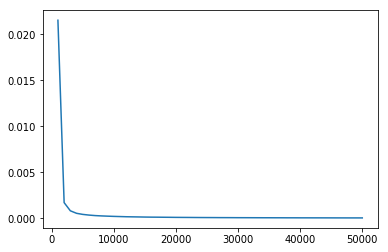

In [12]:
plt.plot(training_stats['iter'], training_stats['recon_loss'])

### display errors made by the encoder

In [13]:
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append("..") # Adds higher directory to python modules path.
from data.dspritesb import dSpriteBackgroundDataset, Rescale

ds = dSpriteBackgroundDataset(transform=Rescale(32),shapetype = 'circle')

In [50]:
# inefficient way of getting encoded latents (reconstructed latents)
error = np.zeros((1000,4))
for ii in range(1000):

    x = ds.__getitem__(np.random.randint(1000))
    image = x['image']
    latents = torch.tensor(x['latents'][np.newaxis,:]).float()
    latents[0, 2:] = latents[0,2:] /  32
    recon_latents = enc(torch.tensor(image[np.newaxis, np.newaxis,:, :]).float())

    error[ii,:] = (latents - recon_latents).detach().numpy()


#### errors per coordinate for a 1000 images

Text(0.5, 1.0, 'errors trial x code')

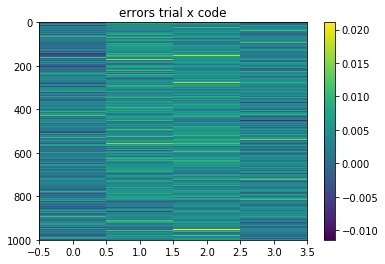

In [54]:
#plt.bar(np.arange(4), np.mean(error,axis=0))
plt.imshow(error, aspect='auto')
plt.colorbar()
plt.title('errors trial x code')

#### distribution of errors per coordinate

first, second: center of Gaussian blob
third, fourth: center of forground circle object

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f742cf0f6d8>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f742cf0f588>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f742cf0f748>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f742cf296d8>}

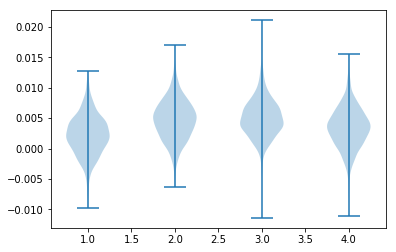

In [56]:
plt.violinplot(error)